## Косарский Иван, ПМИ-3

## Классификация

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.io import arff
import scipy.stats as stats

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

sns.set()

### Загрузка данных

In [2]:
df, meta = arff.loadarff('Training Dataset.arff')
df = pd.DataFrame(df)
df = df.applymap(lambda x: int(x.decode()) if isinstance(x, bytes) else x)

df.head()

/var/folders/dx/jw53r48d1tx21ndwg6f4_0jc0000gn/T/ipykernel_38766/4229222162.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: int(x.decode()) if isinstance(x, bytes) else x)


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


### Анализ и визуализация данных приведены в первой части лабораторной работы!!!

### Построение модели

#### Разделение набора данных

In [3]:
X = df.drop(['Result'], axis=1)
y = df['Result']

print(f'X shape: {X.shape} \ny shape: {y.shape}')

X shape: (11055, 30) 
y shape: (11055,)


#### Train | Test разделение

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

stats.ttest_ind(a=y_train, b=y_test)

TtestResult(statistic=0.019144592427899856, pvalue=0.9847261038832389, df=11053.0)

In [5]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.926617 (0.010966)
LDA: 0.920510 (0.009576)
KNN: 0.939960 (0.008138)
CART: 0.962009 (0.006089)
NB: 0.604366 (0.016320)
SVC: 0.942900 (0.009842)


#### Дерево решений имеет наилучшую метрику

### Обучение конкретной модели и проверка на тестовых данных

In [6]:
cart_model = DecisionTreeClassifier()

cart_model.fit(X_train, y_train)
cart_pred = cart_model.predict(X_test)
cart_accuracy = accuracy_score(y_test, cart_pred)

print(f'Точность дерева решений: %f' % cart_accuracy)

Точность дерева решений: 0.968792


### Визуализация решений

#### Понижение размерности

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_train)
X_2d_test = pca.transform(X_test)

# URL_of_Anchor & SSLfinal_State

Точность дерева решений: 0.900498


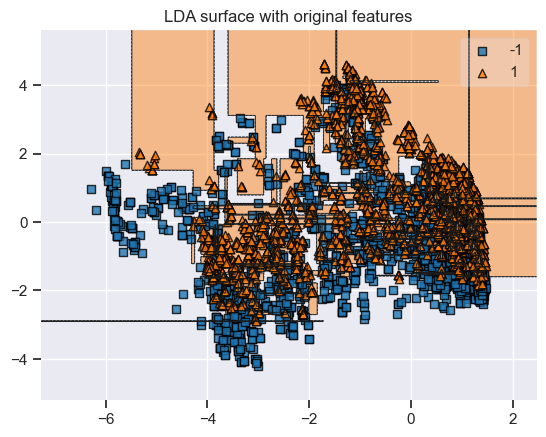

In [8]:
from mlxtend.plotting import plot_decision_regions

y_s = y_train

y_2d = y_s.values

cart_model_plot1 = DecisionTreeClassifier()
cart_model_plot1.fit(X_2d, y_2d)

plt.title('LDA surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=cart_model_plot1)

cart_pred_plot = cart_model_plot1.predict(X_2d_test)
cart_accuracy_plot = accuracy_score(y_test, cart_pred_plot)

print(f'Точность дерева решений: %f' % cart_accuracy_plot)

### После понижения размерности точность модели стала хуже